# Connor Bell Captstone Task II

## Part I. Research Question

### A. Research Question

For my analysis, I wanted to examine the relationship that certain variables have on a houses' price. Our research question that we will be using is "To what extent do Number of Bedrooms, Bathrooms, Square Footage, and Lot Size affect Housing Prices in New York?" Now, we are going to be using a Multiple Linear Regression model to evaluate this question, so our variable choices all need to be quantitative variables, which they are. I am choosing to only include houses in New York to try and limit the amount of external factors that could have outside influence on our model. Keeping all of our values from the same relative location allows us to, ideally, ignore the other nuances in real estate that location naturally brings.

This question serves many purposes. Analyzing housing prices in New York offers important insights for various stakeholders in the real estate sector. Understanding the key factors influencing housing prices not only aids buyers, sellers, and investors in making informed decisions but also assists policymakers and urban planners in crafting effective housing policies. This analysis can identify trends, such as the impact of square footage, location, amenities, and show the combined impact that these variables have on explaining the observed variance that we see in house prices. This information allows those involved in the real estate market to optimize pricing strategies, predict market trends, and tailor their approach to investing, allowing for better-informed decisions. Also, by determining if we can use our variables to better explain the observed variances in our housing prices, we can gain a more comprehensive understanding of the factors that shape the real estate market in New York, ultimately creating a more efficient and responsive housing marketplace.

Our hypothesis is that the model will demonstrate that our variables do in fact have a statistically significant impact on house prices. The model will further demonstrate this by explaining the observed variance we see in our data. Because of this Our Null and Alternative Hypotheses are as follows:

<b>Null hypothesis</b> - Number of Bedrooms, Bathrooms, Square Footage, and Lot Size do not have a statistically significant affect Housing Prices in New York.							     
<b>Alternate Hypothesis</b> – Number of Bedrooms, Bathrooms, Square Footage, and Lot Size have a statistically significant affect Housing Prices in New York.

## Part II. Data Collection

### B. Data Collection Process

My data collection process was fairly simple. I knew that I wanted to do something relating to real estate. In debating my data collection options, I decided to first check Kaggle, a site that holds thousands of datasets free for public use. A quick search for real estate data revealed the dataset that I ultimately chose to use. It was a rather simple process, and using a publiclly availiable dataset has the largest benefit of being extremely easy to access. It was as simple as downloading the data as a CSV file and I was good to go. The one downside to using a premade dataset however, I don't have any control over the content of the data, including variables. This dataset has 10 variables, and 4 of them aren't of much use to us in this analysis. So we are left with only a handful of variables for us to use. If we had collected the data ourselves, we could of had more control over what data we collected, including variables we would ideally like to test. But since this is premade dataset, we are stuck with what we have.

## Part III. Data Extraction and Preparation

### C. Data Extraction and Preparation Process

Our dataset has 1.4 million values. For the state of New York alone, there are ~680,000 values. For simplicity sake, we are going to narrow that down to 10,000 values, just to keep things simpler and not having to worry about the data taking a long time to load in. Below will be our steps to clean our data and narrow it down to our 10,000 value figure.

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import scipy.stats as stats
import plotly.express as px
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Desktop/WGU/capstone/realtor-data.csv')

In [3]:
data

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1401061,for_sale,NaN,NaN,155.00,Perrysburg,New York,14129.0,NaN,NaN,325000.0
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0


As we can see, we have over 1.4 million values. To start, we will filter out all of our values that are not in New York

In [4]:
data_NY = data[data['state'] == 'New York']
data_NY

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
30149,for_sale,3.0,1.0,60.00,Berlin,New York,12022.0,1176.0,NaN,175000.0
54248,for_sale,3.0,2.0,2.02,Claverack,New York,12521.0,1600.0,2021-11-24,425000.0
54258,for_sale,4.0,2.0,0.24,Copake,New York,12521.0,1239.0,2018-02-01,225000.0
54259,for_sale,3.0,3.0,1.90,Copake,New York,12516.0,1800.0,NaN,419000.0
54262,for_sale,3.0,2.0,2.00,Copake,New York,12517.0,1482.0,NaN,365000.0
...,...,...,...,...,...,...,...,...,...,...
1401061,for_sale,NaN,NaN,155.00,Perrysburg,New York,14129.0,NaN,NaN,325000.0
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0


Now that we have only are New York values, we will go ahead and get rid of any values where we have a NaN value in any of our variables that we are going to be using in our analysis, which include: bed, bath, acre_lot, and house_size, and price. We will also throw in variables like city and zip_code, because that might be a useful piece of information we can use later.

In [5]:
cols_to_check = ['bed', 'bath', 'acre_lot', 'house_size', 'price','city','zip_code']

data_NN = data_NY.dropna(subset=cols_to_check)
data_NN

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
30149,for_sale,3.0,1.0,60.00,Berlin,New York,12022.0,1176.0,NaN,175000.0
54248,for_sale,3.0,2.0,2.02,Claverack,New York,12521.0,1600.0,2021-11-24,425000.0
54258,for_sale,4.0,2.0,0.24,Copake,New York,12521.0,1239.0,2018-02-01,225000.0
54259,for_sale,3.0,3.0,1.90,Copake,New York,12516.0,1800.0,NaN,419000.0
54262,for_sale,3.0,2.0,2.00,Copake,New York,12517.0,1482.0,NaN,365000.0
...,...,...,...,...,...,...,...,...,...,...
1401060,for_sale,3.0,1.0,0.10,Dunkirk,New York,14048.0,1002.0,2017-04-03,29900.0
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0


We also need to check for any duplicate values, and drop those

In [6]:
print(data_NN.duplicated().value_counts())

True     269889
False     28568
Name: count, dtype: int64


It appears that almost 270,000 of our 300,000ish values are duplicates, which feels impossibly high. However, since we only want 10,000 values in the end, we will go ahead and remove all those duplicated rows.

In [7]:
data_NN = data_NN.drop_duplicates()
data_NN

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
30149,for_sale,3.0,1.0,60.00,Berlin,New York,12022.0,1176.0,NaN,175000.0
54248,for_sale,3.0,2.0,2.02,Claverack,New York,12521.0,1600.0,2021-11-24,425000.0
54258,for_sale,4.0,2.0,0.24,Copake,New York,12521.0,1239.0,2018-02-01,225000.0
54259,for_sale,3.0,3.0,1.90,Copake,New York,12516.0,1800.0,NaN,419000.0
54262,for_sale,3.0,2.0,2.00,Copake,New York,12517.0,1482.0,NaN,365000.0
...,...,...,...,...,...,...,...,...,...,...
1401002,for_sale,3.0,2.0,0.22,Friendship,New York,14739.0,532.0,2004-06-22,118500.0
1401048,for_sale,1.0,1.0,0.25,Forestville,New York,14062.0,696.0,NaN,139000.0
1401058,for_sale,3.0,2.0,3.00,Gerry,New York,14740.0,1568.0,1999-12-27,189900.0
1401059,for_sale,5.0,2.0,0.55,Brocton,New York,14716.0,4260.0,NaN,95000.0


Before we move on, our zip_code variable is saved as a float, which zip codes are obviously not. We will convert them to strings to ensure we don't run into any issues with that.

In [12]:
data_NN['zip_code'] = data_NN['zip_code'].astype(str)

In [14]:
data_NN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28568 entries, 30149 to 1401063
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status          28568 non-null  object 
 1   bed             28568 non-null  float64
 2   bath            28568 non-null  float64
 3   acre_lot        28568 non-null  float64
 4   city            28568 non-null  object 
 5   state           28568 non-null  object 
 6   zip_code        28568 non-null  object 
 7   house_size      28568 non-null  float64
 8   prev_sold_date  17702 non-null  object 
 9   price           28568 non-null  float64
dtypes: float64(5), object(5)
memory usage: 2.4+ MB


Alright, before we actually select our 10,000 values, we are going to first check for outliers. This may seem a little backwards, but I want to avoid grabbing values that have outliers because they will skew the data. We do want a healthy range, but if there are some outrageous outliers, then we want to get rid of those.

In [15]:
quant_var = 'bed','bath','acre_lot','house_size','price'
quant_var

('bed', 'bath', 'acre_lot', 'house_size', 'price')

In [16]:
outlier_list = []

for q in quant_var:
    q3 = data_NN[q].describe().loc["75%"]
    q1 = data_NN[q].describe().loc["25%"]
    iqr = q3-q1
    
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    
    low_outliers = len(data_NN.loc[data_NN[q] < lower])
    up_outliers = len(data_NN.loc[data_NN[q] > upper])
    
    outliers = low_outliers + up_outliers
    
    outlier_list.append(f"{q}: # of outliers: {outliers}")
    
outlier_string = '\n'.join(outlier_list)

In [17]:
print(outlier_string)

bed: # of outliers: 4278
bath: # of outliers: 2482
acre_lot: # of outliers: 4023
house_size: # of outliers: 1842
price: # of outliers: 2533


As we can see, a lot of outliers. Now, we still have 28,000 values left to choose from. So we are going to drop all of our values that have an outlier value in one of their variables, and see if we still have atleast 10,000 values left for our analysis.

In [18]:
for q in quant_var:
    q3 = data_NN[q].describe().loc["75%"]
    q1 = data_NN[q].describe().loc["25%"]
    iqr = q3 - q1
    
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    

    data_NN = data_NN.loc[(data_NN[q] >= lower) & (data_NN[q] <= upper)]

In [19]:
data_NN

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
54258,for_sale,4.0,2.0,0.24,Copake,New York,12521.0,1239.0,2018-02-01,225000.0
54278,for_sale,3.0,2.0,1.20,Millerton,New York,12546.0,1350.0,2018-08-31,375000.0
54528,for_sale,4.0,3.0,1.29,Nassau,New York,12123.0,2274.0,NaN,194900.0
54530,for_sale,2.0,1.0,0.20,Nassau,New York,12123.0,690.0,2005-12-01,40000.0
54531,for_sale,3.0,2.0,1.00,Hoosick Falls,New York,12090.0,980.0,NaN,125000.0
...,...,...,...,...,...,...,...,...,...,...
1400861,for_sale,3.0,2.0,0.21,Lackawanna,New York,14218.0,1351.0,2019-11-04,174900.0
1400875,for_sale,2.0,2.0,0.36,Hamburg,New York,14085.0,1300.0,2011-08-26,280000.0
1400962,for_sale,4.0,1.0,0.34,Belmont,New York,14813.0,1524.0,2008-07-16,39000.0
1400975,for_sale,4.0,2.0,0.50,Friendship,New York,14739.0,1822.0,2014-12-26,147500.0


After removing our outlier values, we still have over 18,000 values to choose from, which will work. Now we will check and see if we have any outliers remaining that our filter process didn't take care of.

In [20]:
outlier_list = []

for q in quant_var:
    q3 = data_NN[q].describe().loc["75%"]
    q1 = data_NN[q].describe().loc["25%"]
    iqr = q3 - q1
    
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    
    low_outliers = len(data_NN.loc[data_NN[q] < lower])
    up_outliers = len(data_NN.loc[data_NN[q] > upper])
    
    outliers = low_outliers + up_outliers
    
    outlier_list.append(f"{q}: # of outliers: {outliers}")

outlier_string = '\n'.join(outlier_list)
print(outlier_string)

bed: # of outliers: 0
bath: # of outliers: 0
acre_lot: # of outliers: 1815
house_size: # of outliers: 206
price: # of outliers: 197


Alright, it does appear we have some outliers left. However, I am going to leave them. Given the criteria used to filter out the outliers, we have gotten rid of our massive values that would have had a rather aggressive impact on our analysis. Also within the housing market itself, there are naturally occuring outliers present. In every housing market in the country, you are likely to find massive homes compared to the average house. We do want to be able to account for some of those, so we will leave in the remaining outliers. Note that we haven't selected our final 10,000 homes to conduct the analysis on. When we do that, we will have a random number of these values with outliers present, which will help account for more observed randomness in our data.

Now that we have all values that will work for our analysis, we will go ahead and take a random sample of 10,000 of those values

In [21]:
df = data_NN.sample(n=10000, random_state=36)
df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
1145356,for_sale,3.0,2.0,0.20,Colonie,New York,12205.0,1002.0,NaN,224900.0
1143678,for_sale,3.0,2.0,0.25,Cohoes,New York,12047.0,1608.0,NaN,259900.0
1106405,for_sale,4.0,3.0,0.46,Bohemia,New York,11716.0,2400.0,NaN,849000.0
452024,for_sale,2.0,1.0,0.08,Carmel,New York,10512.0,640.0,2020-03-05,220000.0
740285,for_sale,3.0,3.0,0.05,Floral Park,New York,11001.0,1437.0,2002-04-01,695555.0
...,...,...,...,...,...,...,...,...,...,...
897110,for_sale,4.0,3.0,0.09,New Hyde Park,New York,11040.0,1731.0,2018-07-24,989000.0
1312574,for_sale,4.0,2.0,0.03,Syracuse,New York,13206.0,1446.0,NaN,129900.0
501772,for_sale,3.0,4.0,0.07,Staten Island,New York,10314.0,1682.0,NaN,810000.0
1316487,for_sale,4.0,2.0,0.51,Binghamton,New York,13901.0,1552.0,NaN,139900.0


And to make it look a more presentable, we will go ahead and reset their index numbers to range from 1-10000, not from there original value from the original data

In [22]:
dfey = df.reset_index(drop=True)
df.index = dfey.index + 1

In [23]:
df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
1,for_sale,3.0,2.0,0.20,Colonie,New York,12205.0,1002.0,NaN,224900.0
2,for_sale,3.0,2.0,0.25,Cohoes,New York,12047.0,1608.0,NaN,259900.0
3,for_sale,4.0,3.0,0.46,Bohemia,New York,11716.0,2400.0,NaN,849000.0
4,for_sale,2.0,1.0,0.08,Carmel,New York,10512.0,640.0,2020-03-05,220000.0
5,for_sale,3.0,3.0,0.05,Floral Park,New York,11001.0,1437.0,2002-04-01,695555.0
...,...,...,...,...,...,...,...,...,...,...
9996,for_sale,4.0,3.0,0.09,New Hyde Park,New York,11040.0,1731.0,2018-07-24,989000.0
9997,for_sale,4.0,2.0,0.03,Syracuse,New York,13206.0,1446.0,NaN,129900.0
9998,for_sale,3.0,4.0,0.07,Staten Island,New York,10314.0,1682.0,NaN,810000.0
9999,for_sale,4.0,2.0,0.51,Binghamton,New York,13901.0,1552.0,NaN,139900.0


Now that we have narrowed down our 1.4 million values down to 10,000, we can discuss the advantages and disadvantages to our methods of narrowing down our data. There are two mani advantages to our methods. Firstly, by narrowing down our data, we significantly reduced the number of rows to analyze, leading to improved processing efficiency, as working with a smaller dataset often requires less computational resources and speeds up data analysis and visualization tasks. The second benefit is by selectively removing datas, we were able to filter out certain values that we didn't want to deal with, such as null values, that makes cleaning the data simpler for us.

The large disadvanatge is the process of filtering and sampling data the way we did may result in the exclusion of certain patterns or outliers that could be crucial for a comprehensive understanding of our data. If there are important insights in the excluded data, our analysis might miss them.

Ultimately, we traded potential information loss for speed and efficiency. Given how large our initial dataset was, it's a fair trade to make.

Alright, and now that we have our cleaned data that is formatted how we like it, we will go ahead and check for duplicate values (again just to make sure) and outliers

In [24]:
print(df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 1 to 10000
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status          10000 non-null  object 
 1   bed             10000 non-null  float64
 2   bath            10000 non-null  float64
 3   acre_lot        10000 non-null  float64
 4   city            10000 non-null  object 
 5   state           10000 non-null  object 
 6   zip_code        10000 non-null  object 
 7   house_size      10000 non-null  float64
 8   prev_sold_date  6486 non-null   object 
 9   price           10000 non-null  float64
dtypes: float64(5), object(5)
memory usage: 781.4+ KB


We have some missing values in our prev_sold_date variable. We are not interested in that in the slightest for this analysis, so we will just go ahead and leave that be.

All of that being sorted, we will now check how many outliers made it in to our values.

In [26]:
outlier_list = []

for q in quant_var:
    q3 = df[q].describe().loc["75%"]
    q1 = df[q].describe().loc["25%"]
    iqr = q3-q1
    
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    
    low_outliers = len(df.loc[df[q] < lower])
    up_outliers = len(df.loc[df[q] > upper])
    
    outliers = low_outliers + up_outliers
    
    outlier_list.append(f"{q}: # of outliers: {outliers}")
    
outlier_string = '\n'.join(outlier_list)

In [27]:
print(outlier_string)

bed: # of outliers: 0
bath: # of outliers: 0
acre_lot: # of outliers: 948
house_size: # of outliers: 105
price: # of outliers: 106


Alright, a good amount of outliers made it in. We are going to check the range of those outliers, just to make sure that we are okay with their range outside of our IQR. As we stated above, we want a little bit of variation of the data to be able to represent the houses that are bigger or smaller then average, but nothing too far out there.

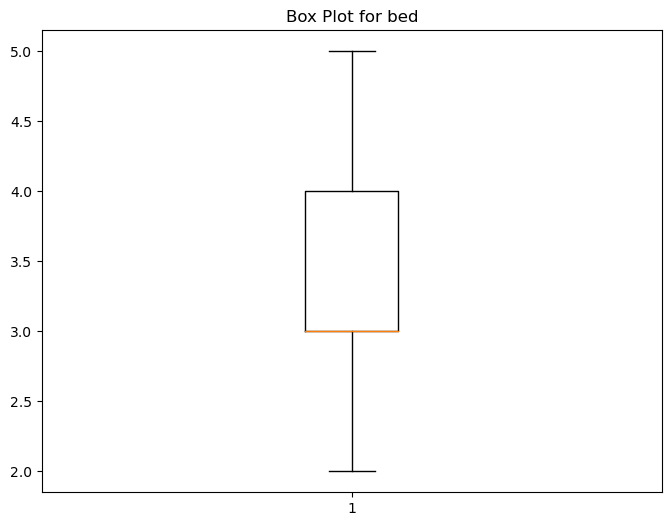

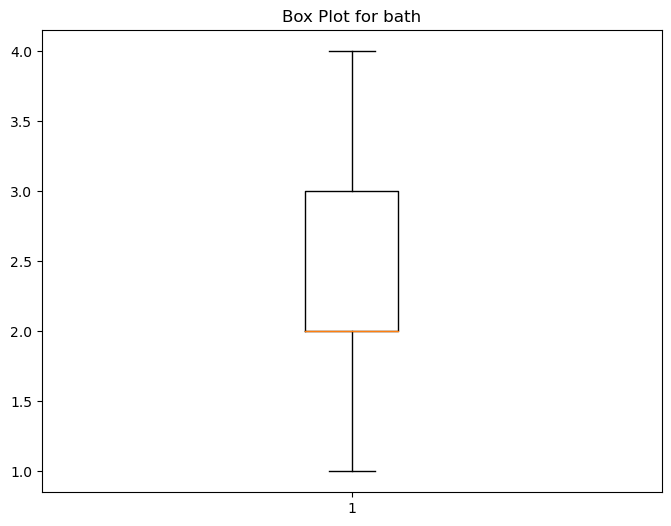

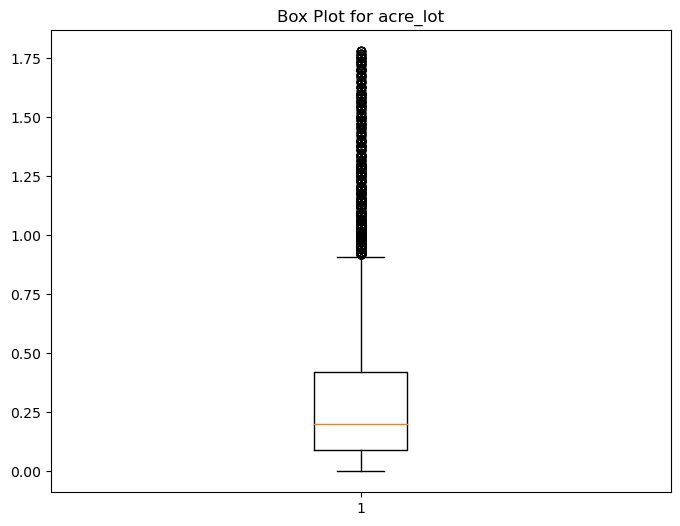

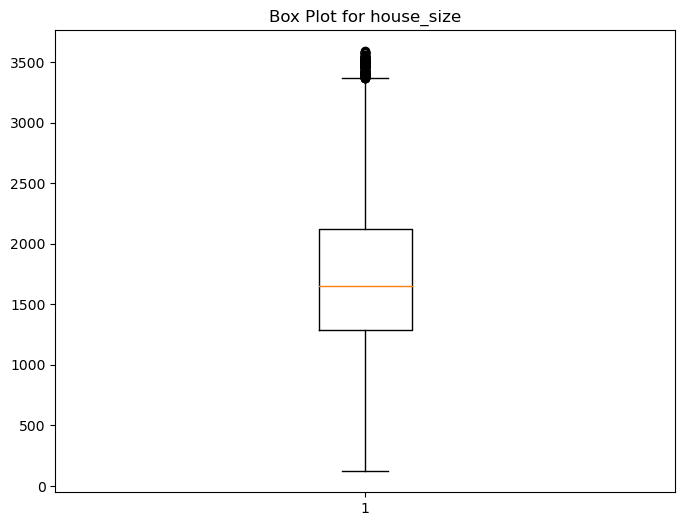

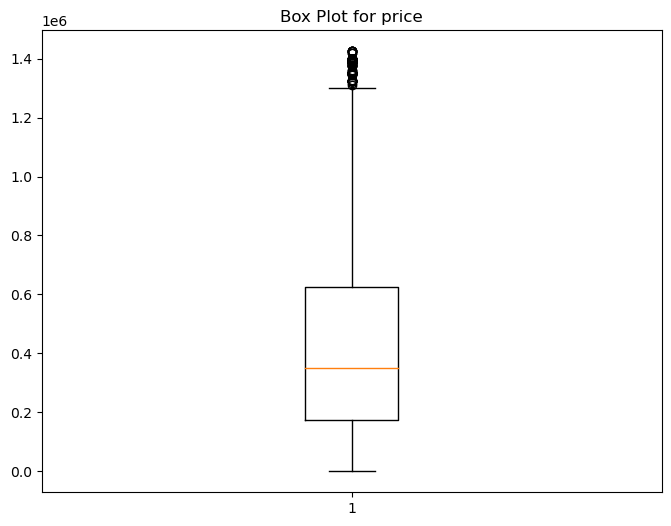

In [38]:
for variable in quant_var:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[variable])
    plt.title(f'Box Plot for {variable}')
    plt.show()

Alright, all of our outliers appear to be within a reasonable range. Obviously the outliers for acre_lot seem to be fairly above our limit. However given the scale of acre_lot, which is rather small, and the practical fact that housing lots vary widely, especially in a state like New York with a large mix of urban and rural areas, we are going to accept those outliers and leave everything as is.

Now that our data has been filtered down, checked for things like null values and duplicates, and treated for outliers in an appropiate manner for our analysis, we are ready to begin the analysis and building of the model.

## Part IV. Analysis

### D. Analysis Process

Now that we are ready to build our model, we will break down the steps of our model.

<b>1. Feature Selection:</b> Identify the independent variables (features) that are relevant for predicting the target variable.

<b>2. Train-Test Split:</b> Split the dataset into training and testing sets to assess the model's generalization to new data.

<b>3. Model Building:</b> Use the training set to fit the MLR model, estimating the coefficients for each independent variable.

<b>4. Model Evaluation:</b> Evaluate the model's performance on the testing set, using metrics like Mean Squared Error (MSE) or R-squared.

<b>5. Model Interpretation:</b> Interpret the coefficients of the model to understand the relationship between independent variables and the target variable.

<b>6. Model Fine-Tuning:</b> Adjust the model, if necessary, based on insights from evaluation or other considerations.

<b>7. Prediction:</b> Use the trained model to make predictions on new or unseen data.

<b>8. Evaluation:</b> Evaluate and interpret our model's effectiveness.

<b>Feature Selection</b> is simple for us. We have 5 total variables we are going to be using for our model. Our target variable will be price, and our predictor variables will be bed, bath, acre_lot, and house_size. They are all continuous, quantitative variables.

Splitting our data into <b>Training and Testing Datasets</b> allows for model training on one subset and evaluation on another, providing an unbiased assessment of the model's performance on unseen data. This helps detect overfitting and ensures the model's ability to be applied to real world data.

We will be splitting our model into an 80/20 split, which is common practice.

In [41]:
X = df[['bed','bath','acre_lot','house_size']]
y = df['price']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

To verify it works, the train datasets should have 8000 values and the test should have 2000

In [50]:
X_train.shape

(8000, 4)

In [49]:
X_test.shape

(2000, 4)

Now our data is split how we want it, we can begin building our initial model.

We start our <b>Model Build</b> by running it on our train dataset. We will be using the Linear Regression module from statsmodels library to build the model for us.

In [53]:
X_train_with_intercept = sm.add_constant(X_train)

# Create and fit the model using statsmodels
stats_model = sm.OLS(y_train, X_train_with_intercept).fit()

# Print the summary
print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     646.9
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:15:22   Log-Likelihood:            -1.1148e+05
No. Observations:                8000   AIC:                         2.230e+05
Df Residuals:                    7995   BIC:                         2.230e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.494e+04   1.33e+04      4.136      0.0

Alright, we have built our initial model. We will go ahead and take a brief look at our initial results.

Constant (const):
Coefficient (coef): 54,940
Interpretation: The estimated intercept when all predictor variables are zero.
Significance: Significant (p-value < 0.05).

bed:
Coefficient (coef): -9,427.96
Interpretation: Holding other variables constant, an increase in the number of bedrooms is associated with a decrease in the price.
Significance: Significant (p-value = 0.035).

bath:
Coefficient (coef): 163,300
Interpretation: Holding other variables constant, an increase in the number of bathrooms is associated with an increase in the price.
Significance: Significant (p-value < 0.05).

acre_lot:
Coefficient (coef): -142,300
Interpretation: Holding other variables constant, an increase in the acreage of the lot is associated with a decrease in the price.
Significance: Significant (p-value < 0.05).

house_size:
Coefficient (coef): 57.23
Interpretation: Holding other variables constant, an increase in house size is associated with an increase in the price.
Significance: Significant (p-value < 0.05).\

R-squared and Adjusted R-squared values are .245 and .244. This means that our model explains about 24.5% of the observed variance in price.

Some of these make sense, others not so much. However, we are not too concerned with our individual results. We are solely focused on building an accurate model. If we were focused on individual variables, when deciding to perform any feature selection, we would simply see that since all of our variables have a p-value less than 0.05, indicating they are significant, and keep them all in. 

However, we are focused on building an accurate model, and our r-squared values are not where we want them to be. Because of this, we are going to use the Lasso technique, which is Least Absolute Shrinkage and Selection Operator. this method introduces a penalty term that encourages sparsity in our coefficients. This performs automatic feature selection by shrinking some of our soefficients to zero. Doing this will hopefully improve the results that we see from our model.

In [62]:
lasso_model = Lasso(alpha=1)  
lasso_model.fit(X_train, y_train)

coefficients_dict = {var: coef for var, coef in zip(X_train.columns, lasso_model.coef_)}

for variable, coefficient in coefficients_dict.items():
    print(f"{variable}: {coefficient}")

const: 0.0
bed: -9425.471365056004
bath: 163253.77035365472
acre_lot: -142333.50108986773
house_size: 57.23182014705256


A quick glance at the coefficients and we can see that they appear to be fairly similar, but our constant value makes more sense. Const, when 0, indicates that the price is likely to be zero. This makes more sense in our model, becasue if all of our variables were 0, then there wouldn't be a house at all. But as we stated above, we are focused on overall ability to predict variance in our data, so we want to calculate the R-squared for the data.

In [59]:
y_train_pred_lasso = lasso_model.predict(X_train)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)

print("R-squared for Lasso model on the training set:", r2_train_lasso)

R-squared for Lasso model on the training set: 0.2445268848792692


We can see that the r-squared is practically identical to our initial models. This isn't a shock given that our coefficients for our variables are very similar as well.

## Part VI. Data Summary and Implications

### E. Summary of Implications

### F. Sources

Lasso - https://corporatefinanceinstitute.com/resources/data-science/lasso/#:~:text=LASSO%2C%20short%20for%20Least%20Absolute,by%20Statistics%20Professor%20Robert%20Tibshirani.

In [63]:
woof

NameError: name 'woof' is not defined